In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import norm
from pandas_datareader import DataReader
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# tech_list = ['NFLX', 'AAPL']

# # set up Start and End time for data grab
# start = datetime(end.year-3,end.month,end.day)
# print(start)
# print(end)
# for stock in tech_list:
#     globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
current = datetime.now()

In [4]:
train_start = datetime(current.year-3, current.month, current.day)
train_end = datetime(current.year-1, current.month, current.day)
train_data = DataReader('AAPL', 'yahoo', train_start, train_end)
print(train_start)
print(train_end)
train_data

2016-11-25 00:00:00
2018-11-25 00:00:00


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-25,111.870003,110.949997,111.129997,111.790001,11475900.0,106.788933
2016-11-28,112.470001,111.389999,111.430000,111.570000,27194000.0,106.578766
2016-11-29,112.029999,110.070000,110.779999,111.459999,28528800.0,106.473701
2016-11-30,112.199997,110.269997,111.599998,110.519997,36162300.0,105.575737
2016-12-01,110.940002,109.029999,110.370003,109.489998,37086900.0,104.591812
...,...,...,...,...,...,...
2018-11-19,190.699997,184.990005,190.000000,185.860001,41925300.0,183.108780
2018-11-20,181.470001,175.509995,178.369995,176.979996,67825200.0,174.360245
2018-11-21,180.270004,176.550003,179.729996,176.779999,31124200.0,174.163193


In [5]:
test_start = datetime(current.year-1, current.month, current.day+1)
test_end = current
test_data = DataReader('AAPL', 'yahoo', test_start, test_end)
print(test_start)
print(test_end)
test_data

2018-11-26 00:00:00
2019-11-25 18:19:08.781344


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-26,174.949997,170.259995,174.240005,174.619995,44998500.0,172.035172
2018-11-27,174.770004,170.880005,171.509995,174.240005,41387400.0,171.660797
2018-11-28,181.289993,174.929993,176.729996,180.940002,46062500.0,178.261627
2018-11-29,182.800003,177.699997,182.660004,179.550003,41770000.0,176.892197
2018-11-30,180.330002,177.029999,180.289993,178.580002,39531500.0,175.936554
...,...,...,...,...,...,...
2019-11-19,268.000000,265.390015,267.899994,266.290009,19041800.0,266.290009
2019-11-20,266.079987,260.399994,265.540009,263.190002,26558600.0,263.190002
2019-11-21,264.010010,261.179993,263.690002,262.010010,30348800.0,262.010010


In [6]:
# train_data['Adj Close'].plot(figsize=(20, 8))

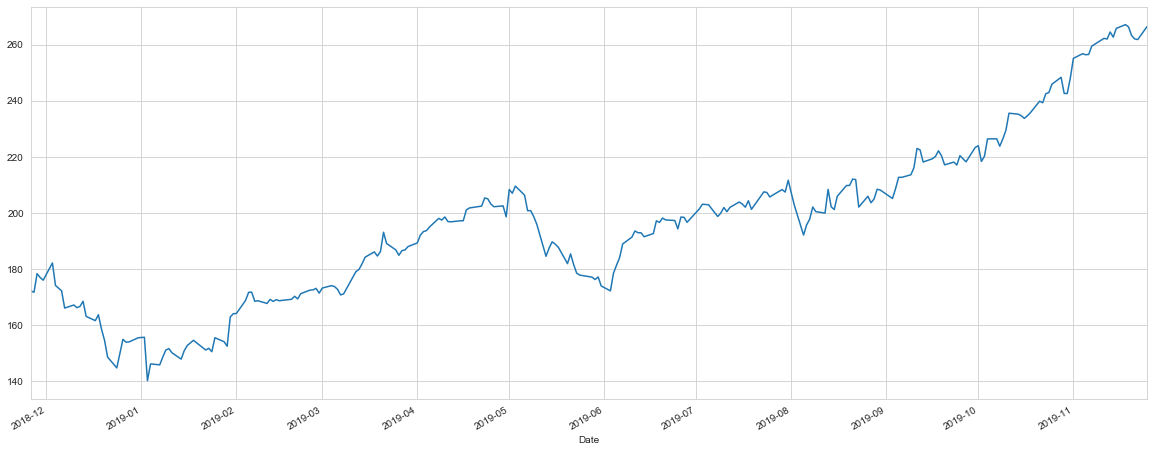

In [6]:
test_data['Adj Close'].plot(figsize=(20, 8))

In [11]:
data = test_data['Adj Close']

Take log

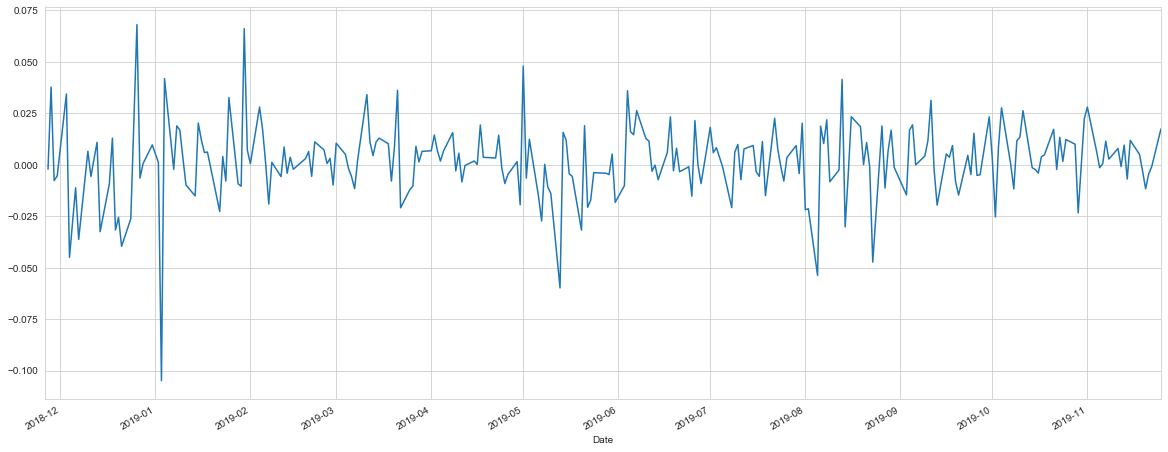

In [12]:
log_return = np.log(1+ data.pct_change())
log_return.plot(figsize=(20, 8))

<img src='Resources/equatio.gif'>
<img src='Resources/eq2.png'>

### r = drift + stddev * e^r

In [13]:
u = log_return.mean()
var = log_return.var()
stdev = log_return.std()
drift = u - (0.5*var)

array([[0.97928435, 0.36001351, 0.66165046, ..., 0.75979863, 0.23613506,
        0.46233336],
       [0.64111819, 0.71691965, 0.96186713, ..., 0.96291469, 0.95984566,
        0.94312528],
       [0.52881165, 0.95020197, 0.38470534, ..., 0.98469678, 0.18578305,
        0.09093696],
       ...,
       [0.201139  , 0.44613916, 0.46554078, ..., 0.00848129, 0.54295687,
        0.32262067],
       [0.58451635, 0.72809921, 0.51361906, ..., 0.56313158, 0.18144027,
        0.88075084],
       [0.14367547, 0.58714448, 0.7203453 , ..., 0.00263882, 0.75230472,
        0.37938279]])

In [40]:
TIME_INTERVAL = 300 # Number of days
ITERATION = 50 # Number of future predictions
daily_return = np.exp(drift + stdev * norm.ppf(np.random.rand(TIME_INTERVAL, ITERATION)))
daily_return

array([[1.00926974, 1.00999471, 0.9920343 , ..., 0.98727719, 1.00007681,
        1.00558745],
       [1.00245065, 0.98623615, 1.02632838, ..., 0.99458853, 1.02050764,
        1.00270027],
       [1.02970235, 0.99292421, 1.03004032, ..., 1.01840792, 1.0263956 ,
        0.99966118],
       ...,
       [1.01773266, 1.00499783, 1.02850554, ..., 1.012243  , 0.98185065,
        0.99348794],
       [1.00576016, 1.03733139, 1.0204659 , ..., 1.01864918, 0.99475377,
        0.98937099],
       [1.02298065, 0.99534632, 0.99431805, ..., 1.03061009, 0.98561481,
        1.01729675]])

In [41]:
price_list = np.zeros_like(daily_return)
price_list[0] = data.iloc[0]

for i in range(1, TIME_INTERVAL):
    price_list[i] = price_list[i-1] * daily_return[i]
price_list

array([[172.03517151, 172.03517151, 172.03517151, ..., 172.03517151,
        172.03517151, 172.03517151],
       [172.45676955, 169.6673051 , 176.5645794 , ..., 171.10420846,
        175.56320698, 172.49971285],
       [177.57914038, 168.46677572, 181.86863598, ..., 174.25388038,
        180.19730377, 172.44126644],
       ...,
       [266.70483018, 295.71224239, 226.47917651, ..., 274.68845925,
        261.77141007, 180.53939254],
       [268.24109265, 306.75159037, 231.11427589, ..., 279.81117437,
        260.39809739, 178.62043705],
       [274.40544669, 305.32406767, 229.801096  , ..., 288.37621864,
        256.65222178, 181.70999043]])

In [42]:
y_label = [] 
for i in test_data['Adj Close'].index.to_list():
    y_label.append(str(i)[:-9])

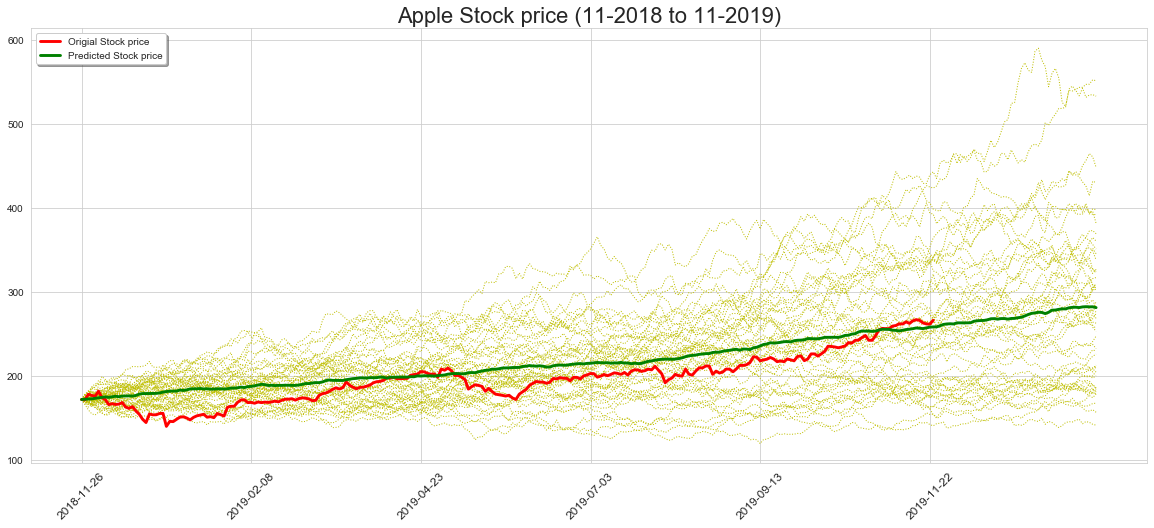

In [46]:
plt.figure(figsize=(20,8))
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        
plt.title('Apple Stock price (11-2018 to 11-2019)', fontsize=22)
plt.xticks(range(0, test_data['Adj Close'].shape[0], 50), y_label[::50] ,rotation=45, fontsize=12)    
plt.plot(price_list, 'y:', linewidth=1)
plt.plot(test_data['Adj Close'].to_list(), 'r', label='Origial Stock price', linewidth=2.9)
plt.plot(np.mean(price_list, axis = 1), 'g', label='Predicted Stock price', linewidth=2.9)
plt.legend(loc='upper left', ncol=1, shadow=True)
plt.savefig('applestock.png')

### Evaluation

In [44]:
def calculateDifference(original, predicted):
    difference = abs(original - predicted)
    percentage_difference = difference / predicted # Percent by element.
    mean_pct_diff = np.mean(percentage_difference*100) # Average percentage over all elements.
    print('{} % differece between original and predicted stock prices'.format(round(mean_pct_diff,2)))

In [45]:
calculateDifference(test_data['Adj Close'].to_list(), np.mean(price_list, axis=1)[:len(data)])

7.68 % differece between original and predicted stock prices
